<a href="https://colab.research.google.com/github/quinn-dougherty/DS-Sprint-01-Dealing-With-Data/blob/master/module3-basicdatavisualizations/LS_DS_113_Plotting_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

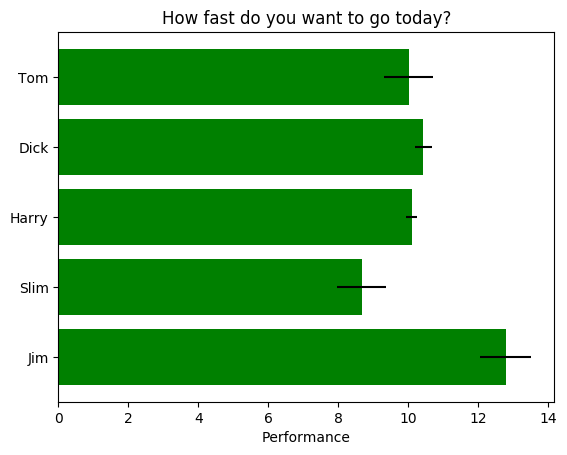

In [1]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

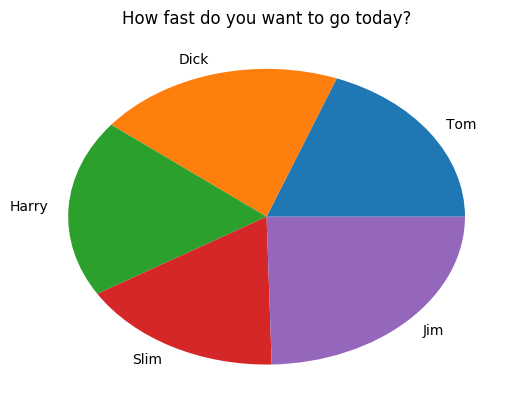

In [2]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


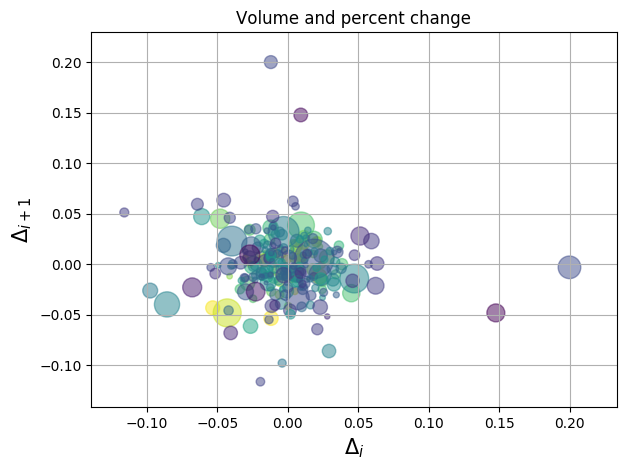

In [3]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

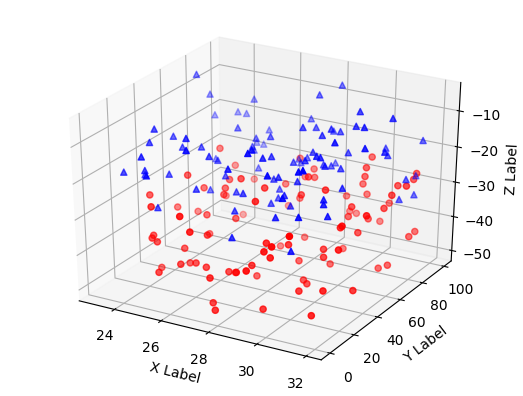

In [4]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Live Lecture Demo!

Lets load some data and draw some plots.

In [1]:
import pandas as pd
import numpy as np
water_treatment_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/water-treatment/water-treatment.data'
water_data = pd.read_csv(water_treatment_url, header=None)
#replace ?
water_data.replace('?',np.nan, inplace=True)
water_data.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,D-1/3/90,44101,1.50,7.8,NaN,407,166,66.3,4.5,2110,...,2000,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,NaN,443,214,69.2,6.5,2660,...,2590,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,NaN,528,186,69.9,3.4,1666,...,1888,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5


 1  Q-E        (input flow to plant)  
 2  ZN-E       (input Zinc to plant)
 3  PH-E       (input pH to plant) 
 4  DBO-E      (input Biological demand of oxygen to plant) 
 5  DQO-E      (input chemical demand of oxygen to plant)
 6  SS-E       (input suspended solids to plant)  
 7  SSV-E      (input volatile supended solids to plant)
 8  SED-E      (input sediments to plant) 
 9  COND-E     (input conductivity to plant) 
10  PH-P       (input pH to primary settler)
11  DBO-P      (input Biological demand of oxygen to primary settler)
12  SS-P       (input suspended solids to primary settler)
13  SSV-P      (input volatile supended solids to primary settler)
14  SED-P      (input sediments to primary settler) 
15  COND-P     (input conductivity to primary settler)
16  PH-D       (input pH to secondary settler) 
17  DBO-D      (input Biological demand of oxygen to secondary settler)
18  DQO-D      (input chemical demand of oxygen to secondary settler)
19  SS-D       (input suspended solids to secondary settler)
20  SSV-D      (input volatile supended solids to secondary settler)
21  SED-D      (input sediments to secondary settler)  
22  COND-D     (input conductivity to secondary settler) 
23  PH-S       (output pH)   
24  DBO-S      (output Biological demand of oxygen)
25  DQO-S      (output chemical demand of oxygen)
26  SS-S       (output suspended solids)
27  SSV-S      (output volatile supended solids) 
28  SED-S      (output sediments) 
29  COND-S     (output conductivity)
30  RD-DBO-P   (performance input Biological demand of oxygen in primary settler)
31  RD-SS-P    (performance input suspended solids to primary settler)
32  RD-SED-P   (performance input sediments to primary settler)
33  RD-DBO-S   (performance input Biological demand of oxygen to secondary settler)
34  RD-DQO-S   (performance input chemical demand of oxygen to secondary settler)
35  RD-DBO-G   (global performance input Biological demand of oxygen)
36  RD-DQO-G   (global performance input chemical demand of oxygen)
37  RD-SS-G    (global performance input suspended solids) 
38  RD-SED-G   (global performance input sediments)

In [4]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
water_data.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,527,509,524,527.000000,504,521,526,516,502,527.000000,527.000000,487,527.000000,516,503,527.000000,527.000000,499,518,525,514,502,527.000000,526,504,509,522,510,499,526,465,523,500,487,501,491,502,519,496
unique,527,503,172,NaN,204,288,141,274,59,NaN,NaN,225,NaN,284,63,NaN,NaN,148,229,74,242,22,NaN,15,43,136,57,193,17,412,314,307,143,184,264,155,230,182,42
top,D-8/1/91,29448,1.00,NaN,133,380,172,66.7,4.5,NaN,NaN,148,NaN,66.7,4.0,NaN,NaN,114,304,86,66.7,0.2,NaN,7.7,15,74,14,80.0,0.00,1605,42.3,50.0,93.3,85.5,73.7,90.3,82.4,91.8,100
freq,1,2,39,NaN,12,7,14,9,63,NaN,NaN,6,NaN,7,44,NaN,NaN,12,7,26,13,159,NaN,134,43,14,38,23,172,4,5,12,23,9,7,11,8,11,193
mean,NaN,NaN,NaN,7.810057,NaN,NaN,NaN,NaN,NaN,1478.620493,7.829981,NaN,253.952562,NaN,NaN,1496.034156,7.811954,NaN,NaN,NaN,NaN,NaN,1490.569260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.246175,NaN,NaN,NaN,NaN,NaN,394.898019,0.226925,NaN,147.458468,NaN,NaN,402.588656,0.199594,NaN,NaN,NaN,NaN,NaN,399.990816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,6.900000,NaN,NaN,NaN,NaN,NaN,651.000000,7.300000,NaN,104.000000,NaN,NaN,646.000000,7.100000,NaN,NaN,NaN,NaN,NaN,85.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,7.600000,NaN,NaN,NaN,NaN,NaN,1201.000000,7.700000,NaN,184.000000,NaN,NaN,1217.000000,7.700000,NaN,NaN,NaN,NaN,NaN,1225.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,7.800000,NaN,NaN,NaN,NaN,NaN,1406.000000,7.800000,NaN,220.000000,NaN,NaN,1420.000000,7.800000,NaN,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,1672.000000,8.000000,NaN,272.000000,NaN,NaN,1713.500000,7.900000,NaN,NaN,NaN,NaN,NaN,1701.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


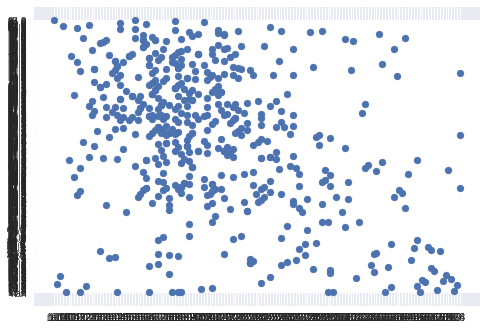

In [9]:
import matplotlib.pyplot as plt

plt.scatter(water_data[6], water_data[7])

In [10]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
    Make a scatter plot of `x` vs `y`.
    
    Marker size is scaled by `s` and marker color is mapped to `c`.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional
        size in points^2.  Default is `rcParams['lines.markersize'] ** 2`.
    
    c : color, sequence, or sequence of color, optional, default: 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an arra

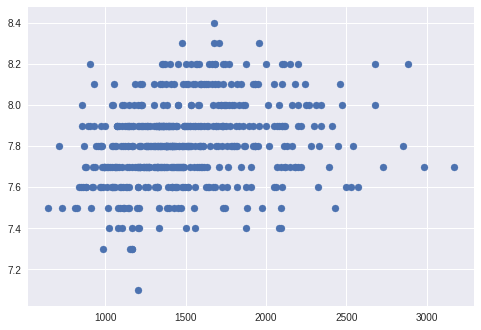

In [19]:
plt.scatter(water_data[15], water_data[16])

In [21]:
water_data[16].describe()

count    527.000000
mean       7.811954
std        0.199594
min        7.100000
25%        7.700000
50%        7.800000
75%        7.900000
max        8.400000
Name: 16, dtype: float64

In [23]:
help(plt.boxplot)

Help on function boxplot in module matplotlib.pyplot:

boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_xticks=True, autorange=False, zorder=None, hold=None, data=None)
    Make a box and whisker plot.
    
    Make a box and whisker plot for each column of ``x`` or each
    vector in sequence ``x``.  The box extends from the lower to
    upper quartile values of the data, with a line at the median.
    The whiskers extend from the box to show the range of the
    data.  Flier points are those past the end of the whiskers.
    
    Parameters
    ----------
    x : Array or a sequence of vectors.
        The input data.
    
    notch : bool, optional (False)
        If `True`, will pr

{'boxes': [<matplotlib.lines.Line2D at 0x7f56f86f0d30>],
 'caps': [<matplotlib.lines.Line2D at 0x7f56f86e0128>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f56f87439b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f56f874d358>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f56f86f05f8>,
  <matplotlib.lines.Line2D at 0x7f56f86e6c50>]}

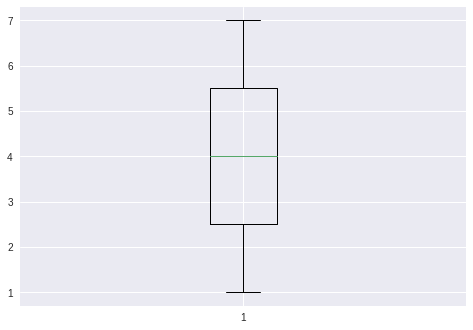

In [24]:
plt.boxplot([1, 3, 5, 7])

{'boxes': [<matplotlib.lines.Line2D at 0x7f56f89d99e8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f56f89c8fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f56f89b6b70>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f56f89bccc0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f56f89d90f0>,
  <matplotlib.lines.Line2D at 0x7f56f89cd0f0>]}

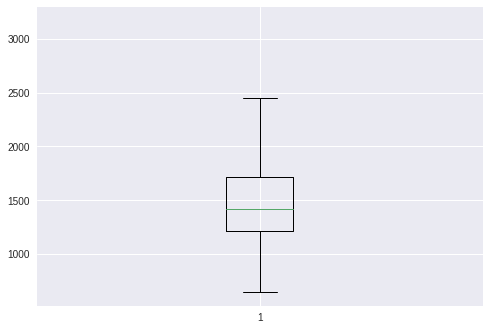

In [25]:
plt.boxplot(water_data[15])

In [26]:
help(water_data[15].groupby)

Help on method groupby in module pandas.core.generic:

groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, **kwargs) method of pandas.core.series.Series instance
    Group series using mapper (dict or key function, apply given function
    to group, return result as series) or by a series of columns.
    
    Parameters
    ----------
    by : mapping, function, str, or iterable
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the groups (the Series' values are first
        aligned; see ``.align()`` method). If an ndarray is passed, the
        values are used as-is determine the groups. A str or list of strs
        may be passed to group by the columns in ``self``
    axis : int, default 0
    level : int, level name, or sequence of such, default None
      

In [29]:
grouped_data = water_data[15].groupby(water_data[16])
dir(grouped_data)

['__bytes__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_accessors',
 '_add_numeric_operations',
 '_agg_doc',
 '_aggregate',
 '_aggregate_multiple_funcs',
 '_aggregate_named',
 '_apply_filter',
 '_apply_to_column_groupbys',
 '_apply_whitelist',
 '_assure_grouper',
 '_builtin_table',
 '_concat_objects',
 '_constructor',
 '_cumcount_array',
 '_cython_agg_general',
 '_cython_table',
 '_cython_transform',
 '_def_str',
 '_deprecations',
 '_dir_additions',
 '_dir_deletions',
 '_get_index',
 '_get_indices',
 '_gotitem',
 '_group_selection',
 '_index_with_as_index',
 '_internal_names',
 '_internal_

In [31]:
help(grouped_data.get_group)

Help on method get_group in module pandas.core.groupby:

get_group(name, obj=None) method of pandas.core.groupby.SeriesGroupBy instance
    Constructs NDFrame from group with provided name
    
    Parameters
    ----------
    name : object
        the name of the group to get as a DataFrame
    obj : NDFrame, default None
        the NDFrame to take the DataFrame out of.  If
        it is None, the object groupby was called on will
        be used
    
    Returns
    -------
    group : type of obj



In [36]:
list(grouped_data)

[(7.1, 424    1203
  Name: 15, dtype: int64), (7.3, 136    1151
  149    1164
  173     986
  443    1165
  Name: 15, dtype: int64), (7.4, 16     1501
  148    1105
  200    2090
  201    2080
  216    1208
  219    1874
  280    1202
  431    1334
  452    1556
  504    1164
  515    1023
  526    1081
  Name: 15, dtype: int64), (7.5, 19     1473
  20     1109
  21     1976
  53     1208
  71     1079
  81     1453
  94     1140
  100    1149
  104    1020
  137    1553
  155    2430
  175    2090
  176     811
  178    1745
  323    1116
  381     646
  382     912
  395    1335
  412    1425
  425     827
  432    1115
  434    1395
  444    1383
  445    1734
  459    1093
  464    1882
  510     731
  525    1198
  Name: 15, dtype: int64), (7.6, 1      2570
  7      1557
  11     1204
  14     1324
  18     1645
  28     1057
  49      972
  59     1307
  65     1415
  70     1267
  77     1327
  86     1039
  88     1008
  91     1439
  107    2320
  118    1113
  131    1417
  1

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


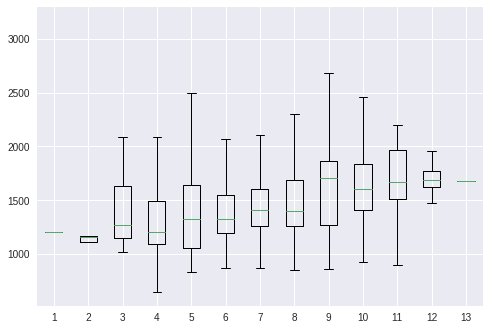

In [44]:
plt.boxplot([group for name, group in grouped_data]);
# implicitly there's another empty "nullop" statement here

In [45]:
help(plt.boxplot)

Help on function boxplot in module matplotlib.pyplot:

boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_xticks=True, autorange=False, zorder=None, hold=None, data=None)
    Make a box and whisker plot.
    
    Make a box and whisker plot for each column of ``x`` or each
    vector in sequence ``x``.  The box extends from the lower to
    upper quartile values of the data, with a line at the median.
    The whiskers extend from the box to show the range of the
    data.  Flier points are those past the end of the whiskers.
    
    Parameters
    ----------
    x : Array or a sequence of vectors.
        The input data.
    
    notch : bool, optional (False)
        If `True`, will pr

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


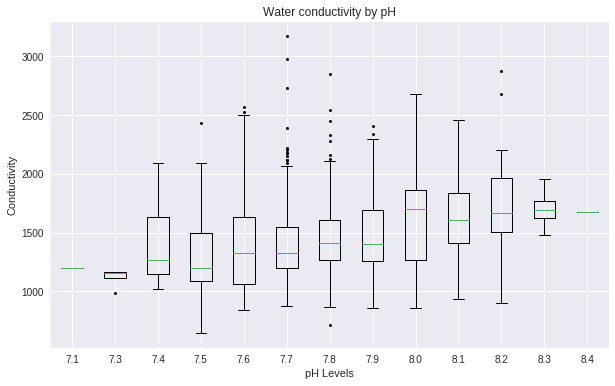

In [92]:
# Let's try to make the boxplot look nicer
boxplot_data = [group for name, group in grouped_data]

fig, ax1 = plt.subplots(figsize=(10, 6))
bp = plt.boxplot(boxplot_data, sym='k.', showfliers=True)
#plt.setp(bp['fliers'], color='red', marker='k.')  # TODO - why does this break?

ax1.set_axisbelow(True)
ax1.set_title('Water conductivity by pH')
ax1.set_xlabel('pH Levels')
ax1.set_ylabel('Conductivity')

# Set x axis labels by grabbing and sorting unique group values
# plt.setp(ax1, xticklabels=sorted(water_data[16].unique()))

# Set x axis labels by getting the names from the grouped data
plt.setp(ax1, xticklabels=[name for name, group in grouped_data])

plt.show()

In [85]:
water_data[16].describe()

count    527.000000
mean       7.811954
std        0.199594
min        7.100000
25%        7.700000
50%        7.800000
75%        7.900000
max        8.400000
Name: 16, dtype: float64

In [89]:
sorted(water_data[16].unique())

[7.1, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4]

In [96]:
x = [1, 2, 3]
y = [4, 5, 6]
print(list(zip(x, y)))

[(1, 4), (2, 5), (3, 6)]


In [102]:
zipped = zip(x, y)

list(zipped)

[(1, 4), (2, 5), (3, 6)]

# Plot assignment

Draw at least 3 plots with the data you loaded yesterday.